In [182]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.io import fits
import pandas as pd
import csv
import scipy
from scipy import optimize
from scipy.optimize import curve_fit

In [183]:
#!cat ASTR19_S22_group_project_data.txt

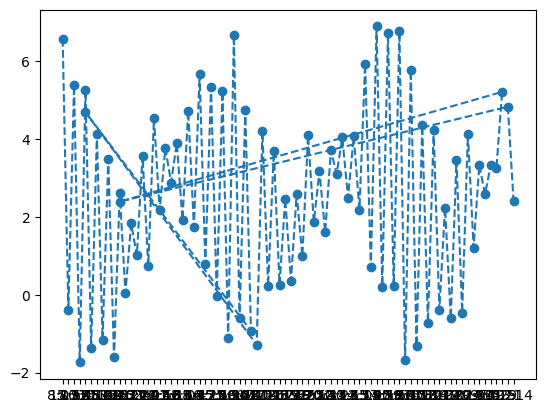

In [231]:
data = ascii.read('ASTR19_S22_group_project_data.txt') #read in the file
df = data.to_pandas()
#df = df.iloc[:, 1:] #remove the first column
df.columns = ['Days','X','Y']

def time_to_decimal(time):  #make the time data plottable 
    hours, minutes = map(int, time.split(':'))
    return round(hours + (minutes / 60),2)
    
#print(df) #print the data

#for index, row in df.iterrows():
    #print(f"Days: {row['Days']}, X: {row['X']}, Y: {row['Y']}")  #define the X and Y 
x = df['X'].to_numpy()
days = df['Days'].to_numpy()
#x=[time_to_decimal(time) for time in xt]
#print(x)

y = df['Y'].to_numpy()
#print(y)

high = []
low = []

for i in range(1,41):
    day1 = df[df['Days'] == i]
    day1_sorted = day1.sort_values(by=['Y'])
    low.append(day1_sorted.iloc[0].values.tolist())
    high.append(day1_sorted.iloc[1].values.tolist())
    #print(day1_sorted)
    #print(day1)
#print(high)
#print(low)

df.

#plt.xlim(0, 80)
#plt.xticks(range(0, 82,10))
#plt.ylim(-3, 7)
#plt.plot(x,y,ls="--")
plt.plot('X', 'Y', data=df, linestyle='--', marker='o')
plt.show()
#plt.errorbar(x,y,yerr = 0.2, fmt ='o')

In [243]:


high_x = [time_to_decimal(time[1]) for time in high]
high_y = [time[2] for time in high]

low_x = [time_to_decimal(time[1]) for time in low]
low_y = [time[2] for time in low]

n_x = []
n_y = []
j=1
for i in range(0,len(high_x)):
    n_x.append(j)
    n_y.append(high_y[i])
    n_x.append(j)
    n_y.append(low_y[i])
    j = j+1
print(n_x)
print(n_y)
    
#print(high_x)
#print(high_y)
#print(low_x)
#print(low_y)

[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5, 11, 11.5, 12, 12.5, 13, 13.5, 14, 14.5, 15, 15.5, 16, 16.5, 17, 17.5, 18, 18.5, 19, 19.5, 20, 20.5, 21, 21.5, 22, 22.5, 23, 23.5, 24, 24.5, 25, 25.5, 26, 26.5, 27, 27.5, 28, 28.5, 29, 29.5, 30, 30.5, 31, 31.5, 32, 32.5, 33, 33.5, 34, 34.5, 35, 35.5, 36, 36.5, 37, 37.5, 38, 38.5, 39, 39.5, 40, 40.5]
[6.57, -0.39, 5.38, -1.74, 5.26, -1.36, 4.13, -1.15, 3.48, -1.61, 2.62, 0.05, 1.83, 1.01, 3.57, 0.73, 4.54, 2.17, 3.76, 2.88, 3.9, 1.92, 4.73, 1.74, 5.66, 0.79, 5.33, -0.04, 5.23, -1.12, 6.67, -0.61, 4.74, -0.93, 4.69, -1.29, 4.2, 0.22, 3.68, 0.26, 2.47, 0.36, 2.59, 0.99, 4.1, 1.87, 3.17, 1.6, 3.71, 3.1, 4.04, 2.49, 4.07, 2.18, 5.93, 0.7, 6.89, 0.21, 6.72, 0.22, 6.77, -1.68, 5.77, -1.32, 4.35, -0.73, 4.23, -0.38, 2.24, -0.61, 3.45, -0.46, 4.13, 1.21, 3.34, 2.58, 3.32, 3.26, 5.21, 2.39]


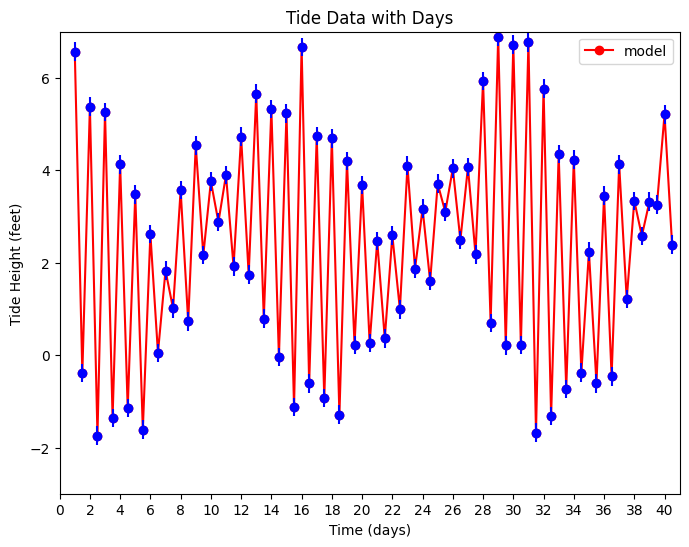

In [251]:
# Combining x and y values for curve fitting
x_combined = high_x + low_x
y_combined = high_y + low_y

plt.figure(figsize=(8, 6))

# Set limits and ticks for X and Y axes
plt.xlim(0, 41)
plt.xticks(range(0, 41, 2))
plt.ylim(-3, 7)


x_a=[i for i in range(1,41)]
#plt.plot( x_a,high_y,color='blue', label='High')
#plt.plot( x_a,low_y, color='red', label='Low')
plt.plot( n_x,n_y, color='red', label='model', marker='o')

plt.errorbar(n_x,n_y, yerr=0.2, color='blue', fmt ='o')

# Labels and legend
plt.xlabel('Time (days)')
plt.ylabel('Tide Height (feet)')
plt.legend()
plt.title('Tide Data with Days')

plt.show()



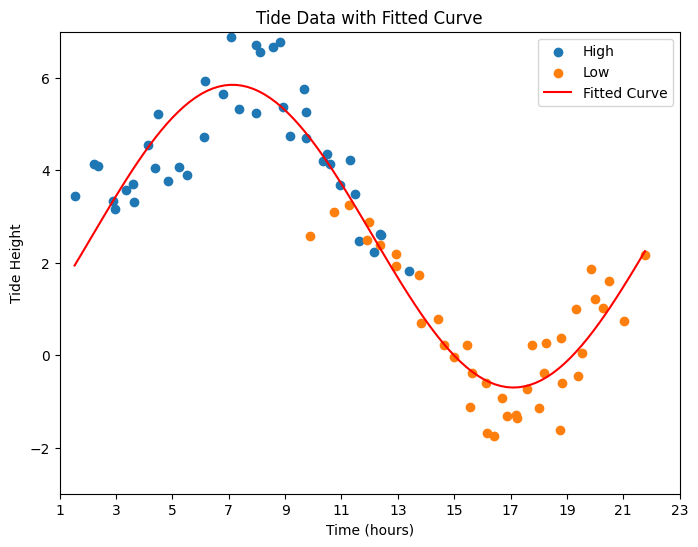

In [237]:
# Combining x and y values for curve fitting
x_combined = high_x + low_x
y_combined = high_y + low_y


# Define the function to fit (sine wave)
def oscillatory_function(x, amplitude, frequency, phase_shift, vertical_shift):
    return amplitude * np.sin(2.0 * np.pi * frequency * x + phase_shift) + vertical_shift

# Fitting the function to the data
initial_guess = [5, 0.1, 0, 0]  # Initial guess for the parameters
params, covariance = curve_fit(oscillatory_function, x_combined, y_combined, p0=initial_guess)

# Generate points for the fitted curve
x_curve = np.linspace(min(x_combined), max(x_combined), 100)
y_curve = oscillatory_function(x_curve, *params)
high_y_curve = oscillatory_function(np.array(x_combined), *params)


# Plotting the data points and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(high_x, high_y, label='High')
plt.scatter(low_x, low_y, label='Low')
plt.plot(x_curve, y_curve, color='red', label='Fitted Curve')
#plt.scatter(np.array(x_combined), high_y_curve, color='green', label='Fitted Curve')



"""plt.figure()
plt.scatter( high_x,high_y,color='blue', label='Inter-day')
plt.scatter(low_x,low_y, color='red', label='Intra-day')
plt.xlabel("x")
plt.ylabel("y")
plt.show()"""

# Set limits and ticks for X and Y axes
plt.xlim(1, 23)
plt.xticks(range(1, 24, 2))
plt.ylim(-3, 7)

# Labels and legend
plt.xlabel('Time (hours)')
plt.ylabel('Tide Height')
plt.legend()
plt.title('Tide Data with Fitted Curve')

plt.show()


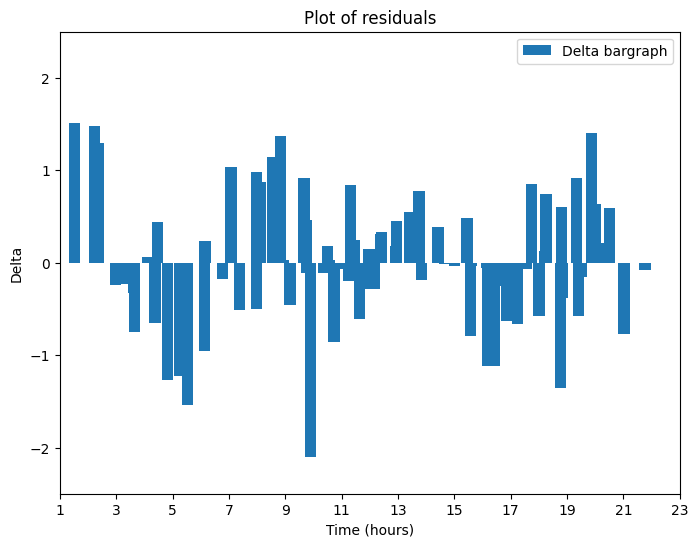

In [188]:
# Combining x and y values for curve fitting
x_combined = high_x + low_x
y_combined = high_y + low_y


# Define the function to fit (sine wave)
def oscillatory_function(x, amplitude, frequency, phase_shift, vertical_shift):
    return amplitude * np.sin(2.0 * np.pi * frequency * x + phase_shift) + vertical_shift

# Fitting the function to the data
initial_guess = [5, 0.1, 0, 0]  # Initial guess for the parameters
params, covariance = curve_fit(oscillatory_function, x_combined, y_combined, p0=initial_guess)

# Generate points for the fitted curve
x_curve = np.linspace(min(x_combined), max(x_combined), 100)
y_curve = oscillatory_function(x_curve, *params)
high_y_curve = oscillatory_function(np.array(x_combined), *params)


#array of x_combined 
xc=np.array(x_combined)

#creating delta
delta=[]

for i in range(len(high_y_curve)):
    real_y = y_combined[i]
    calc_y = high_y_curve[i]
    d = real_y - calc_y
    delta.append(d)

#creating a bargraph of delta
plt.figure(figsize = (8,6))
plt.bar(xc, delta, width = 0.4, label='Delta bargraph')

#plt.scatter(xc, delta, color='blue', label='Delta bargraph')

# Set limits and ticks for X and Y axes
plt.xlim(1, 23)
plt.xticks(range(1, 24, 2))
plt.ylim(-2.5, 2.5)

# Labels and legend
plt.xlabel('Time (hours)')
plt.ylabel('Delta')
plt.legend()
plt.title('Plot of residuals')

plt.show()


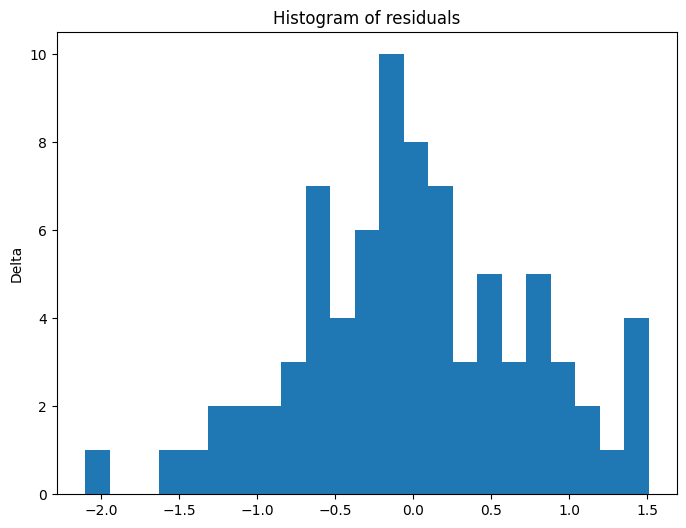

In [195]:
# Combining x and y values for curve fitting
x_combined = high_x + low_x
y_combined = high_y + low_y


# Define the function to fit (sine wave)
def oscillatory_function(x, amplitude, frequency, phase_shift, vertical_shift):
    return amplitude * np.sin(2.0 * np.pi * frequency * x + phase_shift) + vertical_shift

# Fitting the function to the data
initial_guess = [5, 0.1, 0, 0]  # Initial guess for the parameters
params, covariance = curve_fit(oscillatory_function, x_combined, y_combined, p0=initial_guess)

#generate curve for y using x_combined
high_y_curve = oscillatory_function(np.array(x_combined), *params)


#array of x_combined 
xc=np.array(x_combined)

#creating delta
delta=[]

for i in range(len(high_y_curve)):
    real_y = y_combined[i]
    calc_y = high_y_curve[i]
    d = real_y - calc_y
    delta.append(d)

#creating a bargraph of delta
plt.figure(figsize = (8,6))
plt.hist(delta, bins=23)

# Labels and legend
plt.ylabel('Delta')
plt.title('Histogram of residuals')
plt.show()